In [81]:
import numpy as np 
import matplotlib
# Forces the non-interactive backend designed for file output
matplotlib.use('Agg') 
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
import math

#Color palette
colors = [
    '#000000',  # Black
    '#E69F00',  # Orange
    '#56B4E9',  # Sky Blue
    '#009E73',  # Bluish Green
    '#F0E442',  # Yellow
    'purple',  # Blue
    '#D55E00',  # Vermilion
]

# Style settings
# --- Corrected rcParams Block ---
plt.rcParams.update({
    ## Text and Font Settings
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "axes.labelsize": 25,
    "font.size": 16,
    "legend.fontsize": 16,
    "text.latex.preamble": r"\usepackage{amsmath}",

    ## Tick Settings
    "xtick.labelsize": 22,
    "ytick.labelsize": 22,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "xtick.major.size": 8,
    "ytick.major.size": 8,
    "xtick.minor.size": 4,
    "ytick.minor.size": 4,
    
    ## Axes Line Width (for a bolder border)
    "axes.linewidth": 1.5,
    
    ## Turn the default grid OFF in rcParams
    "axes.grid": False,
})

In [7]:
# Load data
dir = "../data" # Directory containing data files
plot_dir = "../image/plot"
input_noise = pd.read_csv(f"{dir}/Noise_sim_postlayout.csv")
gain = pd.read_csv(f"{dir}/Gain_mag_phase.csv")
drift = pd.read_csv(f"{dir}/gain_drift.csv")
                        

## Input noise plot 

In [52]:

col = ['f', 'LNA1', 'LNA2']
input_noise.columns = col

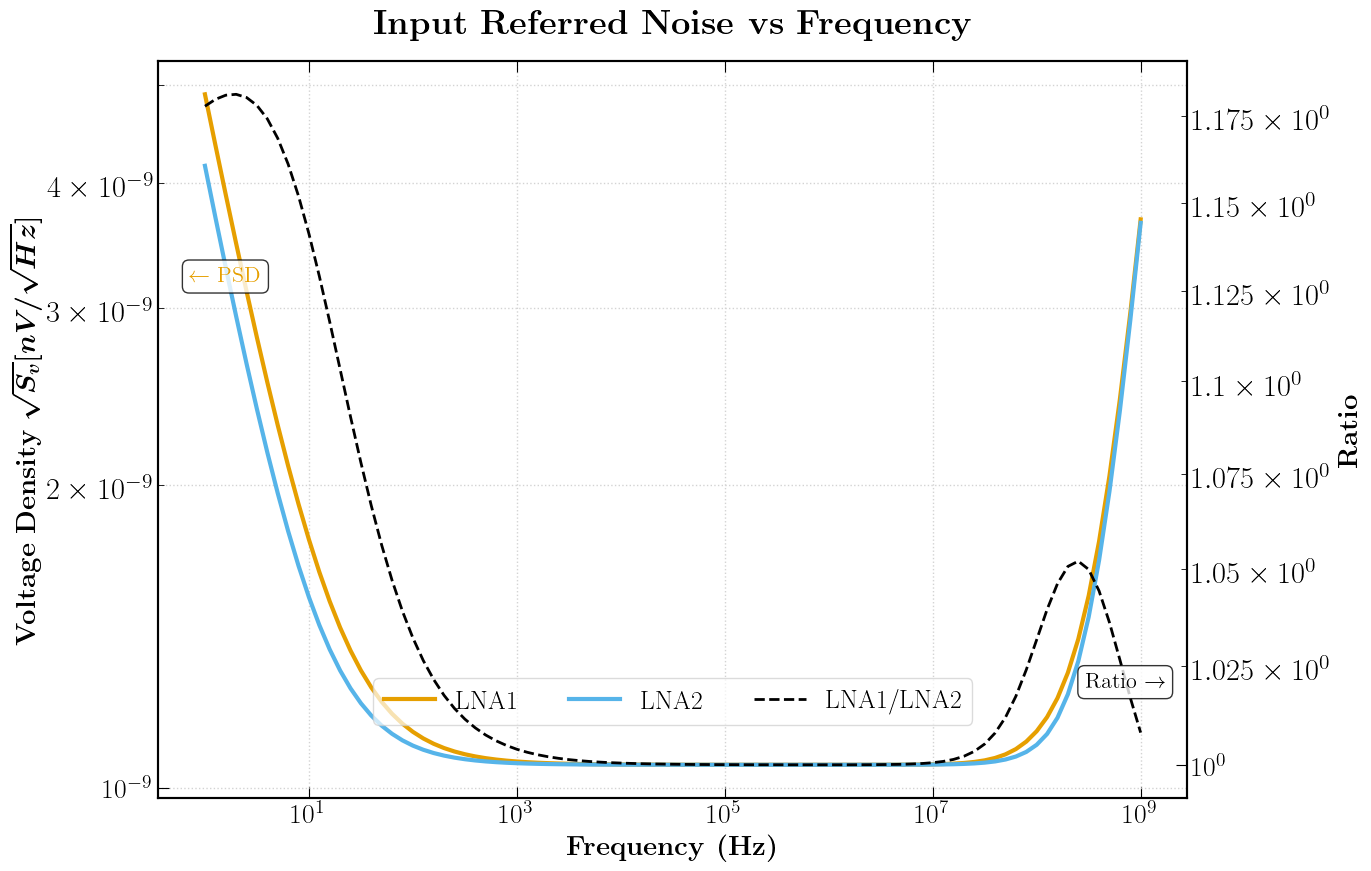

<Figure size 640x480 with 0 Axes>

In [53]:

# --- 2. Plot Setup ---
fig, ax_left = plt.subplots(figsize=(14, 9))

# Create the Twin Axis sharing the X axis
ax_right = ax_left.twinx()

# --- 3. Plotting ---

# Plot Left Axis Data (Voltage Density)
# Note: We capture the plot objects (l1, l2) to use in the legend later
l1 = ax_left.loglog(input_noise['f'], input_noise['LNA1'], 
                    label='LNA1', color=colors[1], lw=3)
l2 = ax_left.loglog(input_noise['f'], input_noise['LNA2'], 
                    label='LNA2', color=colors[2], lw=3)

# Plot Right Axis Data (Ratio)
ratio_color = 'black'
l3 = ax_right.loglog(input_noise['f'], input_noise['LNA1']/input_noise['LNA2'], 
                     linestyle='--', label='LNA1/LNA2', color=ratio_color, lw=2)

# --- 4. Formatting ---

# Global Settings
plt.title(r'\textbf{Input Referred Noise vs Frequency}', fontsize=25, pad=20)
ax_left.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
ax_left.set_xlabel(r'\textbf{Frequency (Hz)}', fontsize=20)

# Left Y-Axis Formatting
ax_left.set_ylabel(r'\textbf{Voltage Density} $\boldsymbol{\sqrt{S_v} [nV/ \sqrt{Hz}]}$', 
                   fontsize=20)
ax_left.tick_params(axis='both', which='major', labelsize=20)

# Right Y-Axis Formatting
ax_right.set_ylabel(r'\textbf{Ratio}', fontsize=20, color=ratio_color)
ax_right.tick_params(axis='y', labelsize=20, colors=ratio_color) # Color the ticks to match
ax_right.spines['right'].set_color(ratio_color) # Color the spine to match

# --- 5. The Combined Legend ---
# We gather handles (lines) and labels from both axes
lines = l1 + l2 + l3  # Combine the lists of lines
labels = [l.get_label() for l in lines] # Extract labels

# Create one legend on the main axis
ax_left.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.18),
               fancybox=True, shadow=False, ncol=3, fontsize=18.5,
               framealpha=0.7)

# --- 6. Annotations (Explicit visual cues) ---

# Annotation for Left Axis
ax_left.annotate(r'$\leftarrow$  PSD    ', xy=(0.03, 0.7), xycoords='axes fraction',
                 fontsize=16, fontweight='bold', color=colors[1],
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec='black', alpha=0.8))

# Annotation for Right Axis
ax_right.annotate(r'Ratio $\rightarrow$', xy=(0.9, 0.15), xycoords='axes fraction',
                  fontsize=16, fontweight='bold', color=ratio_color,
                  bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=ratio_color, alpha=0.8))

plt.tight_layout()
plt.show()
plt.savefig(f"{plot_dir}/Input_Referred_Noise.png", dpi=300)

## Bode plot

In [54]:
col = ['f', 'mag1', 'mag2', 'phase1', 'phase2']
gain.columns = col

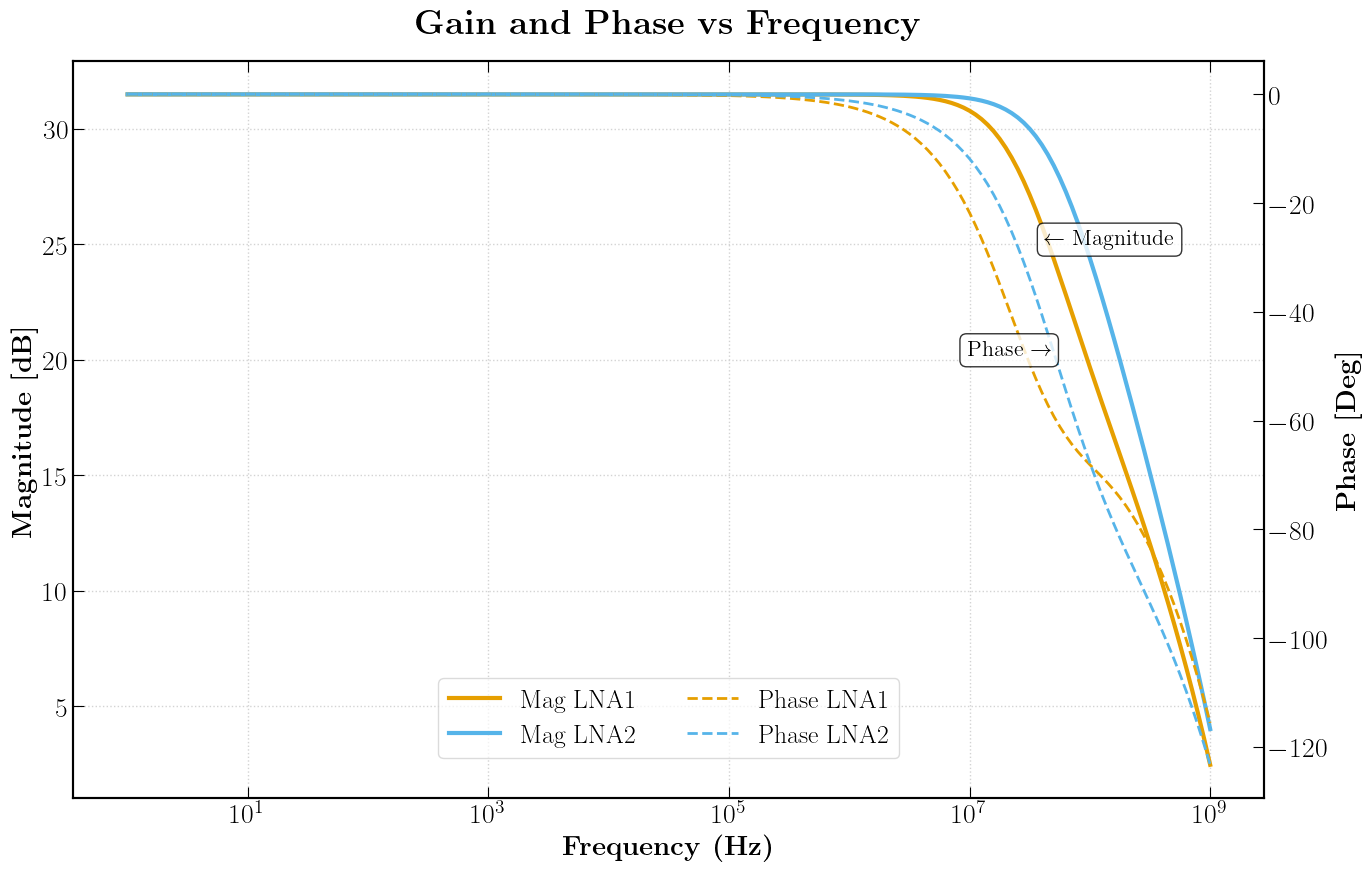

In [80]:
# --- 2. Plot Setup ---
fig, ax_left = plt.subplots(figsize=(14, 9))
ax_right = ax_left.twinx()

# Define the missing variable
ratio_color = 'black' 

# --- 3. Plotting ---

# Left Axis (Magnitude)
l1 = ax_left.semilogx(gain['f'], gain['mag1'], 
                      label='Mag LNA1', color=colors[1], lw=3)
l2 = ax_left.semilogx(gain['f'], gain['mag2'], 
                      label='Mag LNA2', color=colors[2], lw=3)

# Right Axis (Phase)
phase_style = '--' # Short for dashed
# ADDED LABELS HERE
l3 = ax_right.semilogx(gain['f'], gain['phase1'], 
                       label='Phase LNA1', color=colors[1], lw=2, linestyle=phase_style)
l4 = ax_right.semilogx(gain['f'], gain['phase2'], 
                       label='Phase LNA2', color=colors[2], lw=2, linestyle=phase_style)

# --- 4. Formatting ---

# Corrected Title
plt.title(r'\textbf{Gain and Phase vs Frequency}', fontsize=25, pad=20)

ax_left.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
ax_left.set_xlabel(r'\textbf{Frequency (Hz)}', fontsize=20)

# Left Y-Axis
ax_left.set_ylabel(r'\textbf{Magnitude [dB]}', fontsize=20)
ax_left.tick_params(axis='both', which='major', labelsize=20)

# Right Y-Axis
ax_right.set_ylabel(r'\textbf{Phase [Deg]}', fontsize=20, color=ratio_color)
ax_right.tick_params(axis='y', labelsize=20, colors=ratio_color)
ax_right.spines['right'].set_color(ratio_color)

# --- 5. Legend ---
# Flatten the list of handles
lines = l1 + l2 + l3 + l4 
labels = [l.get_label() for l in lines]

# Fixed ncol to 2 (since you have 4 items, 2x2 looks better than 3 cols)
ax_left.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.18),
               fancybox=True, shadow=False, ncol=2, fontsize=18.5,
               framealpha=0.7)

# --- 6. Annotations ---
# (Updated color to black for neutrality, or keep colors[1] if intended)
ax_left.annotate(r'$\leftarrow$ Magnitude', xy=(0.815, 0.75), xycoords='axes fraction',
                 fontsize=16, fontweight='bold', color='black',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec='black', alpha=0.8))

ax_right.annotate(r'Phase $\rightarrow$', xy=(0.75, 0.6), xycoords='axes fraction',
                  fontsize=16, fontweight='bold', color=ratio_color,
                  bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=ratio_color, alpha=0.8))

plt.tight_layout()
plt.savefig(f"{plot_dir}/gain.png", dpi=300)
plt.show()

## Gain drift plot 

In [82]:
col = ['f', 'LNA1', 'LNA2']
drift.columns = col

In [ ]:
fix,ax = plt.subplots(figsize=(14, 9))